## Identifying COVID-19 Through Symptomatic Indicators

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
pd.pandas.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score, confusion_matrix, precision_score

In [2]:
myteam_data_set = pd.read_csv('Covid-19_Data.csv')

C:\Users\nikit\AppData\Local\Temp\ipykernel_13744\2073569248.py:1: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  myteam_data_set = pd.read_csv('Covid-19_Data.csv')


In [3]:
myteam_data_set.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


## Data Preprocessing

In [4]:
myteam_data_set.drop('test_date', inplace=True, axis=1)

In [5]:
myteam_data_set['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [6]:
myteam_data_set = myteam_data_set[myteam_data_set['cough']!='None']
myteam_data_set = myteam_data_set[myteam_data_set['fever']!='None']

In [7]:
myteam_data_set.replace(['1', '0'], [1, 0], inplace=True)

In [8]:
np.unique(myteam_data_set['corona_result'])

array(['negative', 'other', 'positive'], dtype=object)

In [9]:
# lets drop other columns and focus more on negative and positive results.
myteam_data_set = myteam_data_set[myteam_data_set['corona_result']!='other']

In [10]:
np.unique(myteam_data_set['corona_result'])

array(['negative', 'positive'], dtype=object)

In [11]:
myteam_data_set['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)

In [12]:
np.unique(myteam_data_set['age_60_and_above'])
# lets drop None columns and focus more on No and Yes results.
myteam_data_set = myteam_data_set[myteam_data_set['age_60_and_above']!='None']

In [13]:
myteam_data_set['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [14]:
np.unique(myteam_data_set['gender'])
myteam_data_set = myteam_data_set[myteam_data_set['gender']!='None']

In [15]:
myteam_data_set['gender'].replace(['female', 'male'], [0, 1], inplace=True)

In [16]:
np.unique(myteam_data_set['test_indication'])

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [17]:
dummies = pd.get_dummies(myteam_data_set['test_indication'])
myteam_data_set.drop('test_indication', inplace=True, axis=1)
myteam_data_set = pd.concat([myteam_data_set, dummies], axis=1)

In [18]:
myteam_data_set.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
122808,1,0,0,0,0,0,1,1,0,0,1
122809,1,0,0,0,0,1,0,0,0,0,1
122810,0,0,0,0,0,0,0,0,0,0,1
122811,0,1,0,0,0,0,0,0,1,0,0
122812,1,0,0,0,0,0,1,0,0,0,1


# Data Visualization

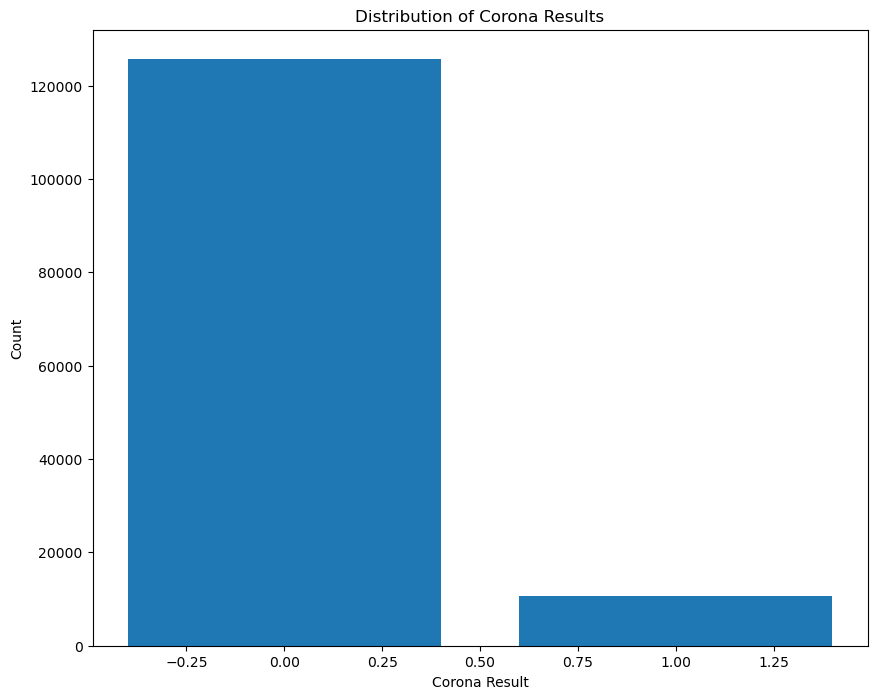

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(myteam_data_set['corona_result'].unique(), myteam_data_set['corona_result'].value_counts())
ax.set_xlabel('Corona Result')
ax.set_ylabel('Count')
ax.set_title('Distribution of Corona Results')
plt.show()

In [20]:
feature_count = []
for unique_characteristic in myteam_data_set:
    col_sum = sum(myteam_data_set[unique_characteristic].values)
    feature_count.append(col_sum)

In [21]:
feature_count = [sum(myteam_data_set[unique_characteristic].values) for unique_characteristic in myteam_data_set]

In [22]:
feature_count

[24851, 12661, 1473, 1061, 2075, 10626, 23701, 69153, 14534, 7402, 114358]

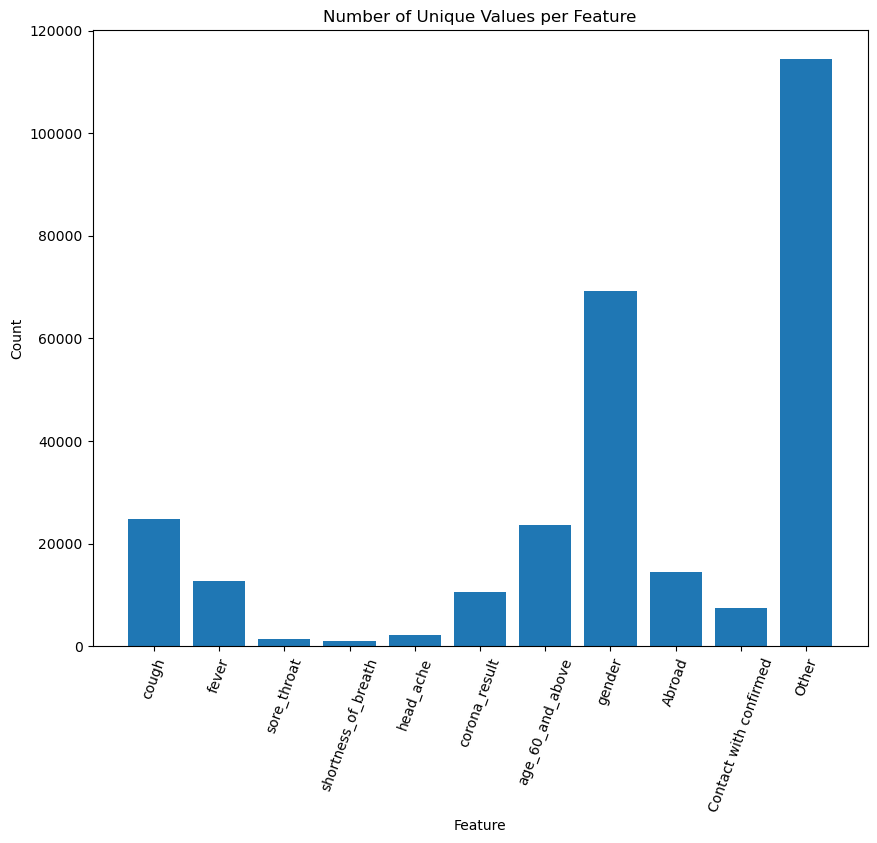

In [23]:
#feature_count = data_set.nunique()

# create a bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(myteam_data_set.columns, feature_count)
ax.set_xlabel('Feature')
ax.set_ylabel('Count')
ax.set_title('Number of Unique Values per Feature')

# add text annotations to the bars
# rotate x-axis tick labels
plt.xticks(rotation=70)

plt.show()

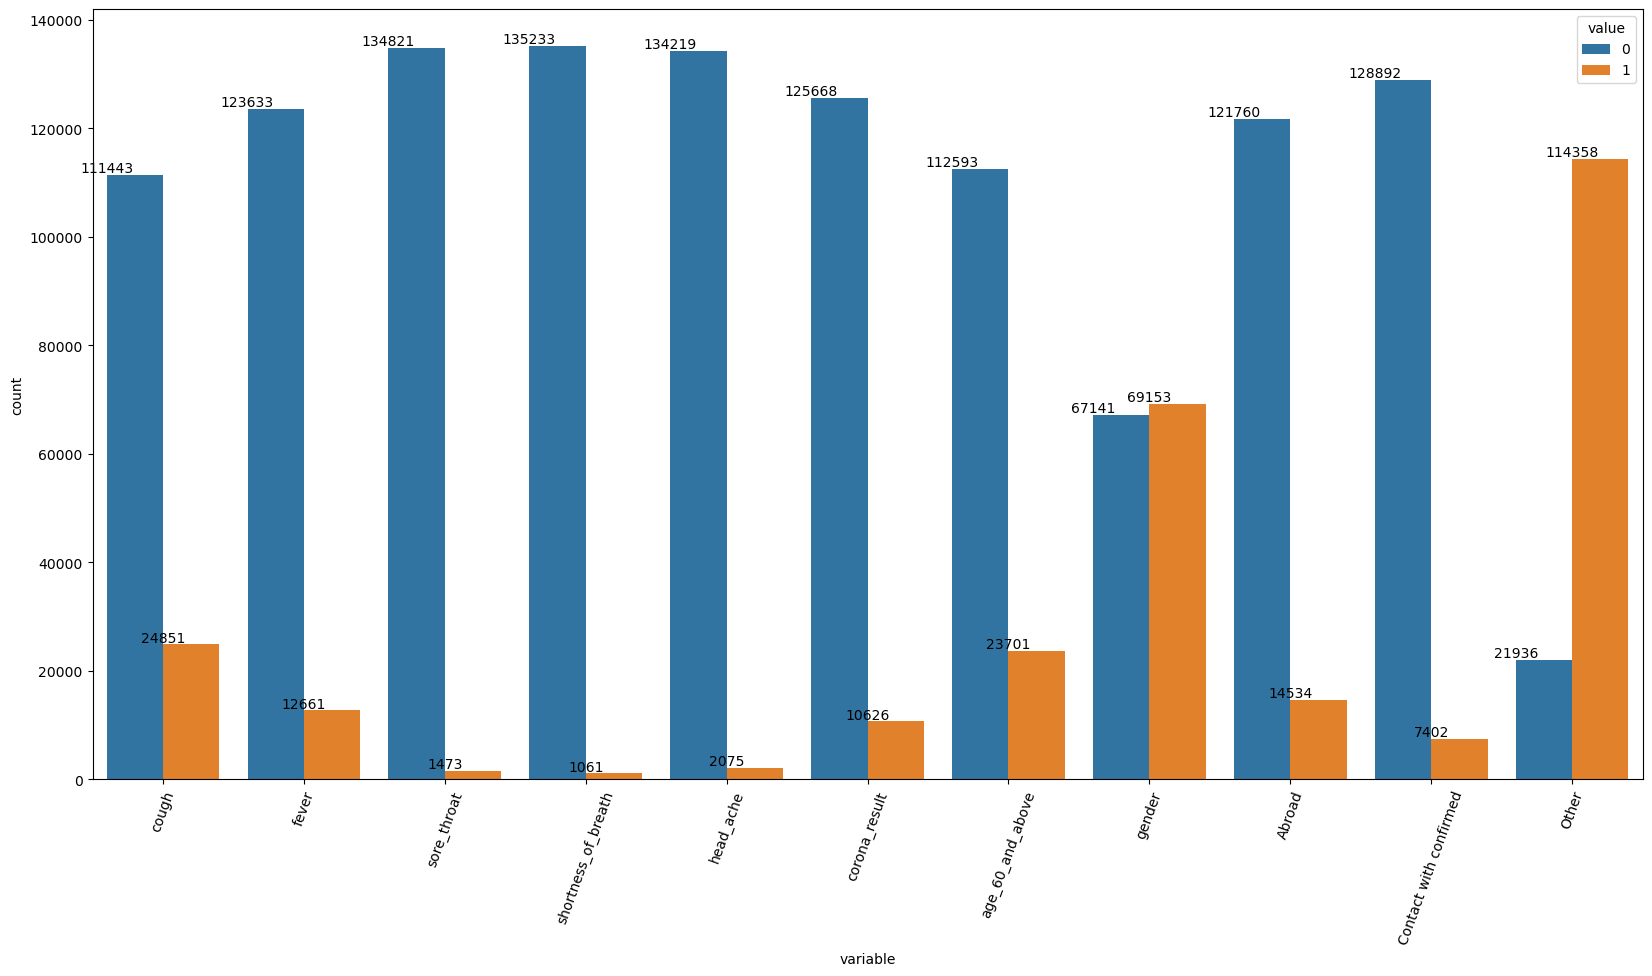

In [24]:
plt.figure(figsize = (20 ,10))
count_plots = sns.countplot(x="variable", hue="value", data=pd.melt(myteam_data_set))
plt.setp(count_plots.get_xticklabels(), rotation=70)
for p in count_plots.patches:
        count_plots.annotate(int(p.get_height()), (p.get_x(), p.get_height()+500), horizontalalignment = "center")
plt.show()

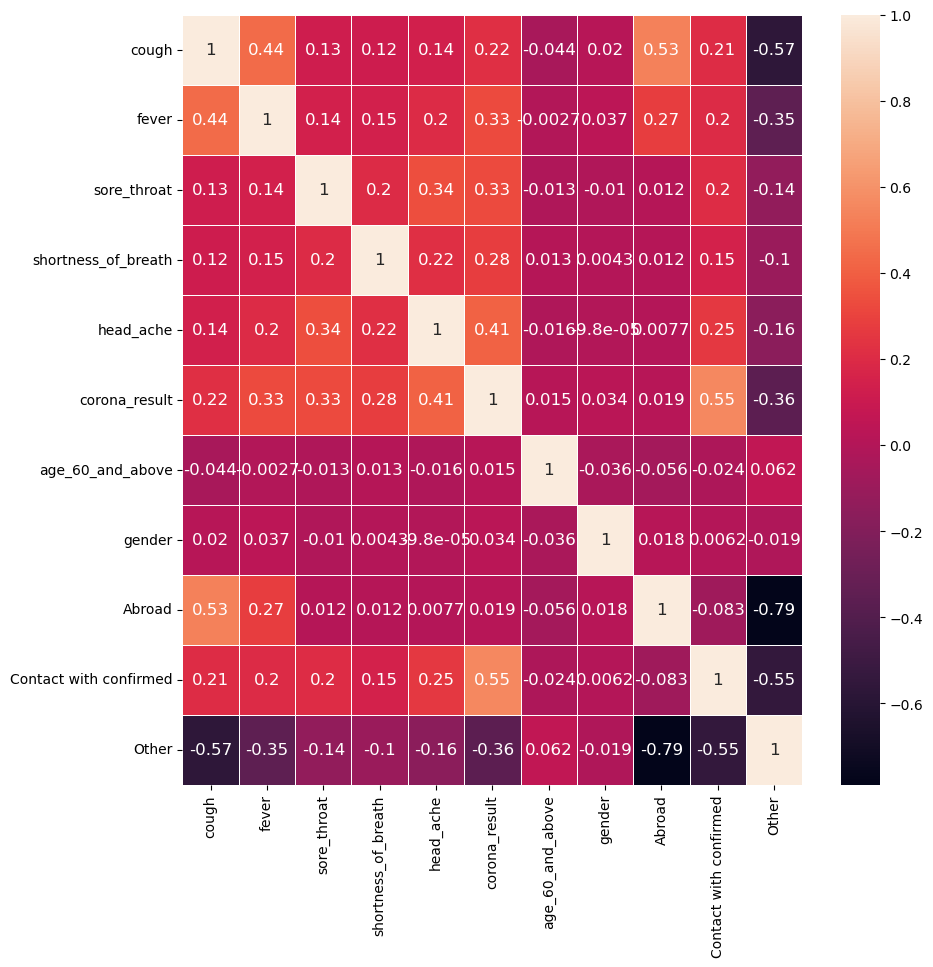

In [25]:
sns.heatmap(myteam_data_set.corr(),annot=True,linewidths=0.4, annot_kws={"size": 12}) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Model Training

In [26]:
myteam_data_set.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
count,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000
mean,0.182334,0.092895,0.010808,0.007785,0.015224,0.077964,0.173896,0.507381,0.106637,0.054309,0.839054
std,0.386121,0.290286,0.103396,0.087887,0.122445,0.268116,0.379022,0.499947,0.308652,0.226627,0.367483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
myteam_data_set.isnull().sum()

cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                    0
Abroad                    0
Contact with confirmed    0
Other                     0
dtype: int64

In [28]:
myteam_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136294 entries, 122808 to 265120
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   cough                   136294 non-null  int64
 1   fever                   136294 non-null  int64
 2   sore_throat             136294 non-null  int64
 3   shortness_of_breath     136294 non-null  int64
 4   head_ache               136294 non-null  int64
 5   corona_result           136294 non-null  int64
 6   age_60_and_above        136294 non-null  int64
 7   gender                  136294 non-null  int64
 8   Abroad                  136294 non-null  uint8
 9   Contact with confirmed  136294 non-null  uint8
 10  Other                   136294 non-null  uint8
dtypes: int64(8), uint8(3)
memory usage: 9.7 MB


In [29]:
y = myteam_data_set['corona_result']

In [30]:
myteam_data_set.drop('corona_result', axis=1, inplace=True)

In [31]:
time_taken = list()

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(myteam_data_set, y, test_size=0.3, random_state=123, stratify=y)
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)

# DecisionTree Algorithm
DecisionTree = DecisionTreeClassifier(random_state=0) 
scores = cross_val_score(DecisionTree, myteam_data_set, y, cv=5) 


print('DecisionTree scores.mean: ', scores.mean()) 
DecisionTree = DecisionTree.fit(X_train, y_train) 
decission_pred = DecisionTree.predict(X_test) 
print('DecisionTree r2_score: ', r2_score(y_test, decission_pred)) 
end = time.time()
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
DecisionTree scores.mean:  0.9579512325481468
DecisionTree r2_score:  0.41485465591589266


# Hyper-parameter tunning

In [33]:
# Parameter tuning to maximum depth to increase accuracy

In [34]:
training_accuracy = list()
validation_accuracy = list()
for max_d in range(1,10):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(DecisionTree.score(X_train, y_train))
    validation_accuracy.append(DecisionTree.score(X_test,y_test))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), DecisionTree.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), DecisionTree.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.9582831088517373
The Validation Accuracy for max_depth 1 is: 0.957934896916041

The Training Accuracy for max_depth 2 is: 0.9582831088517373
The Validation Accuracy for max_depth 2 is: 0.957934896916041

The Training Accuracy for max_depth 3 is: 0.9582831088517373
The Validation Accuracy for max_depth 3 is: 0.957934896916041

The Training Accuracy for max_depth 4 is: 0.9582831088517373
The Validation Accuracy for max_depth 4 is: 0.957934896916041

The Training Accuracy for max_depth 5 is: 0.9582831088517373
The Validation Accuracy for max_depth 5 is: 0.957934896916041

The Training Accuracy for max_depth 6 is: 0.9582831088517373
The Validation Accuracy for max_depth 6 is: 0.957934896916041

The Training Accuracy for max_depth 7 is: 0.9582831088517373
The Validation Accuracy for max_depth 7 is: 0.957934896916041

The Training Accuracy for max_depth 8 is: 0.9582831088517373
The Validation Accuracy for max_depth 8 is: 0.957934896916041

The Trai

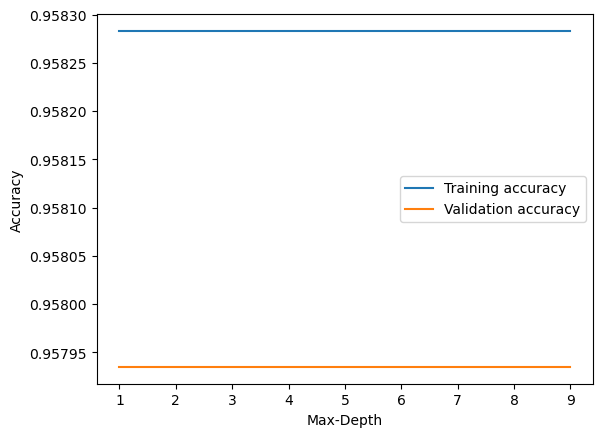

In [35]:
plt.plot(list(range(1,10)), training_accuracy )
plt.plot(list(range(1,10)), validation_accuracy)
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

## Taking any depth would result in same accuracy.

In [36]:
training_accuracy = list()
validation_accuracy = list()
for max_f in range(2,10):
    model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= max_f , random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(DecisionTree.score(X_train, y_train))
    validation_accuracy.append(DecisionTree.score(X_test,y_test))
    print('The Training Accuracy for max_leaf_nodes {} is:'.format(max_f), DecisionTree.score(X_train, y_train))
    print('The Validation Accuracy for max_leaf_nodes {} is:'.format(max_f), DecisionTree.score(X_test,y_test))
    print('')

The Training Accuracy for max_leaf_nodes 2 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 2 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 3 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 3 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 4 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 4 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 5 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 5 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 6 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 6 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 7 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 7 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 8 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 8 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 9 is: 0.9582831088517

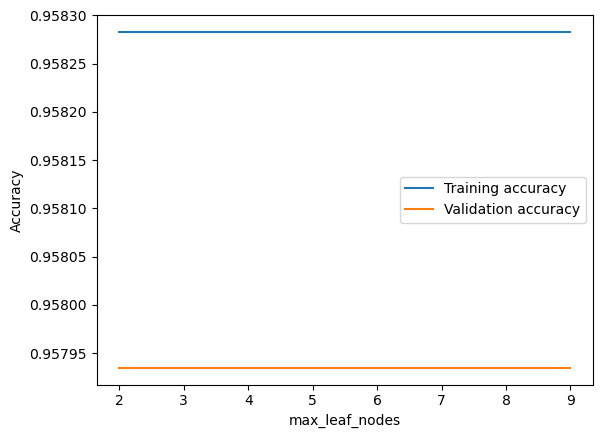

In [37]:
plt.plot(list(range(2,10)), training_accuracy )
plt.plot(list(range(2,10)), validation_accuracy)
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [38]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [39]:
param_dist = {"max_depth": list(range(1,8)),
             "max_features": randint(0,8),
             "min_samples_leaf": randint(1,8),
             "criterion": ["gini", 'entropy']}
tree_cv = RandomizedSearchCV(DecisionTree, param_dist, cv=5)

In [40]:
tree_cv.fit(myteam_data_set, y)

C:\Users\nikit\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB8F8FD850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB8F8D3D90>})

In [41]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 4}

In [42]:
previous_score = tree_cv.best_score_

In [43]:
# lets drop negatively effecting columns 
myteam_data_set.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,Abroad,Contact with confirmed,Other
cough,1.000000,0.444898,0.125416,0.116872,0.135117,-0.044193,0.020147,0.526316,0.209147,-0.571040
fever,0.444898,1.000000,0.143779,0.145360,0.200694,-0.002714,0.037465,0.274075,0.198677,-0.352723
sore_throat,0.125416,0.143779,1.000000,0.200670,0.337043,-0.013321,-0.009988,0.011708,0.204154,-0.135736
shortness_of_breath,0.116872,0.145360,0.200670,1.000000,0.218756,0.013325,0.004286,0.012133,0.148594,-0.101829
head_ache,0.135117,0.200694,0.337043,0.218756,1.000000,-0.016100,-0.000098,0.007713,0.252326,-0.162088
age_60_and_above,-0.044193,-0.002714,-0.013321,0.013325,-0.016100,1.000000,-0.035756,-0.056221,-0.024359,0.062243
gender,0.020147,0.037465,-0.009988,0.004286,-0.000098,-0.035756,1.000000,0.017770,0.006176,-0.018734
Abroad,0.526316,0.274075,0.011708,0.012133,0.007713,-0.056221,0.017770,1.000000,-0.082795,-0.788851
Contact with confirmed,0.209147,0.198677,0.204154,0.148594,0.252326,-0.024359,0.006176,-0.082795,1.000000,-0.547162
Other,-0.571040,-0.352723,-0.135736,-0.101829,-0.162088,0.062243,-0.018734,-0.788851,-0.547162,1.000000


In [44]:
myteam_data_set.drop('Other', axis=1, inplace=True)

In [45]:
tree_cv = RandomizedSearchCV(DecisionTree, param_dist, cv=5)
tree_cv.fit(myteam_data_set, y)

C:\Users\nikit\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nikit\anaconda\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB8F8FD850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB8F8D3D90>})

In [46]:
current_score = tree_cv.best_score_

In [47]:
print(current_score, previous_score)

0.9573495966604508 0.9577164415155413


<BarContainer object of 2 artists>

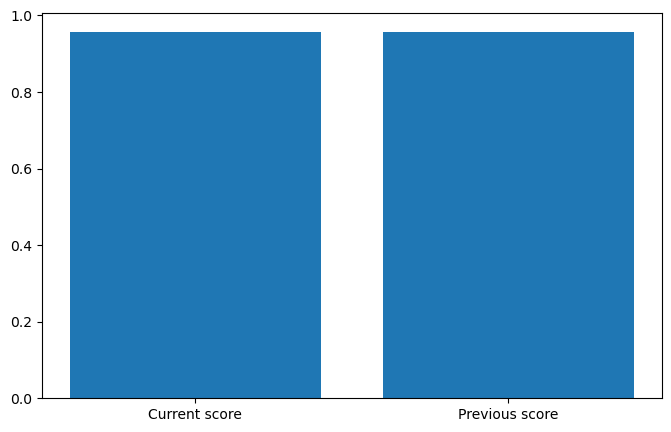

In [48]:
plt.figure(figsize=(8,5))
plt.bar(['Current score', 'Previous score'], [current_score, previous_score])

### The decision tree model has reached a stage where additional parameter tuning does not enhance its accuracy. To enhance the model's accuracy, we must either augment the dataset with more pertinent features or increase the number of distinct records, thereby strengthening the dataset.

# Logistic Regression

In [49]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
log = LogisticRegression()
scores = cross_val_score(log, myteam_data_set, y, cv=5) 
print('LogisticRegression scores.mean: ', scores.mean()) 
log.fit(X_train, y_train) 
pred = log.predict(X_test) 
print('LogisticRegression r2_score: ', r2_score(y_test, pred))
log_score = scores.mean()
end = time.time()
print("\n"+ str(end-start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
LogisticRegression scores.mean:  0.9506875668178327
LogisticRegression r2_score:  0.33967028321671366

2.1495871543884277


# K Nearest Neigbhours

In [50]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
Knn = KNeighborsClassifier()
scores = cross_val_score(Knn, myteam_data_set, y, cv=5) 
print('KNeighborsClassifier scores.mean: ', scores.mean()) 
Knn.fit(X_train, y_train) 
pred = Knn.predict(X_test) 
print('KNeighborsClassifier r2_score: ', r2_score(y_test, pred))
knn_score = scores.mean()
end = time.time()
print("\n"+ str(end-start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
KNeighborsClassifier scores.mean:  0.9509516846912488
KNeighborsClassifier r2_score:  0.3325260668063845

261.9350345134735


# Support Vector Classifier

In [51]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
svc = SVC()
scores = cross_val_score(svc, myteam_data_set, y, cv=5) 
print('SVC scores.mean: ', scores.mean()) 
svc.fit(X_train, y_train) 
pred = svc.predict(X_test) 
print('SVC r2_score: ', r2_score(y_test, pred))
svc_score = scores.mean()
end = time.time()
print("\n"+ str(end - start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
SVC scores.mean:  0.9580466190043124
SVC r2_score:  0.41859686451177935

703.838122844696


# VotingClassifier

In [52]:
vot_clf = VotingClassifier(estimators=[('tree', DecisionTree), ('log', log), ('knn', Knn), ('SVC', svc)], voting='hard')
vot_clf.fit(myteam_data_set, y)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=0)),
                             ('log', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('SVC', SVC())])

In [53]:
vot_pred = vot_clf.predict(myteam_data_set)

In [54]:
vot_clf.score(myteam_data_set, y)

0.9580392387045651

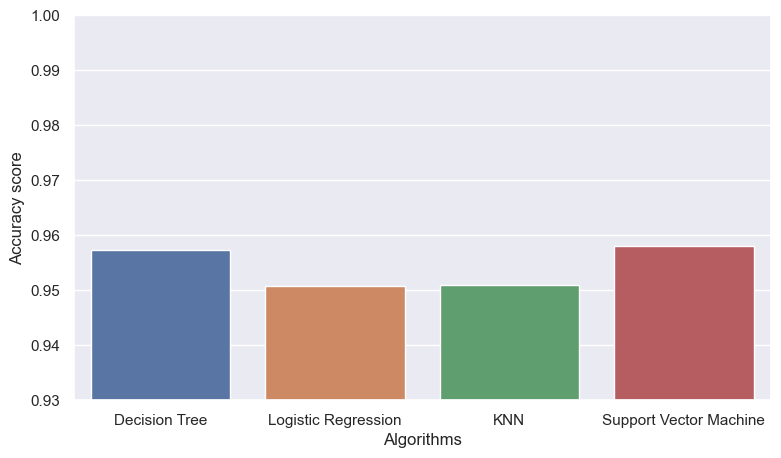

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.color_palette('muted'):
    algorithm_names = ['Decision Tree', 'Logistic Regression', 'KNN', 'Support Vector Machine']
    scores = [current_score, log_score, knn_score, svc_score]
    
    sns.set(rc={'figure.figsize':(9,5)})
    
    # Use barplot with x and y arguments
    sns.barplot(x=algorithm_names, y=scores)
    
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy score")
    plt.ylim(0.93, 1)
    plt.show()

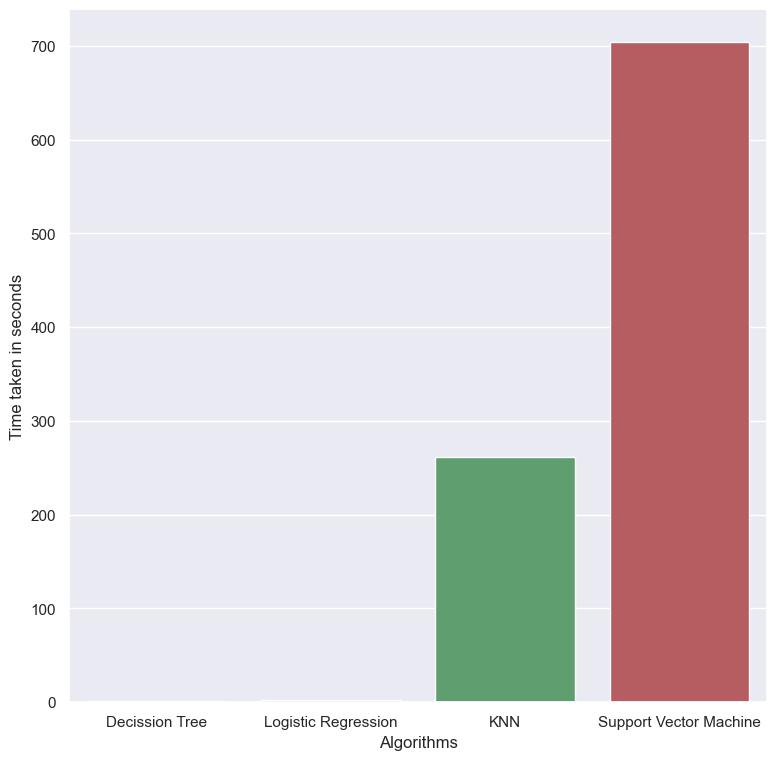

In [56]:
with sns.color_palette('muted'):
    algothrim_name = ['Decission Tree', 'Logistic Regression', 'KNN', 'Support Vector Machine']
    sns.set(rc={'figure.figsize':(9,9)})
    plt.xlabel("Algorithms")
    plt.ylabel("Time taken in seconds")
    sns.barplot(x=algothrim_name, y=time_taken)

# Evaluation metrics

In [57]:
# lets consider Decision-tree beccause the time complexity and accuracy is more for that algorithm

#### Confusion matrix

In [58]:
con_mat = confusion_matrix(y_test, decission_pred)

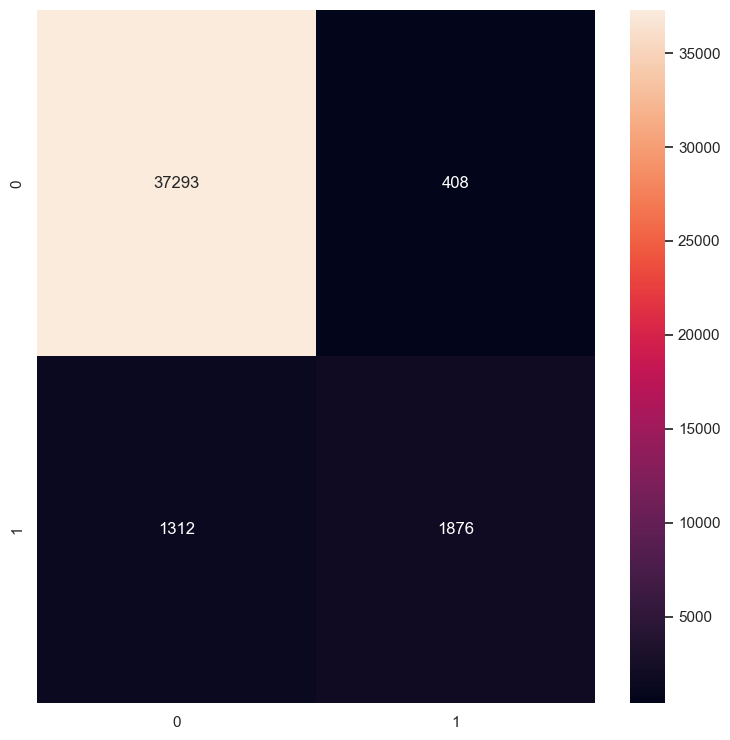

In [59]:
matrix = sns.heatmap(con_mat, annot=True, fmt='.8g')

<p>{0,0} False Negative <br>
{0,1} False Positive <br>
{1,0} True Negative <br>
{1,1} True Positive <br>
</p>

In [60]:
accuracy_score(decission_pred, y_test)

0.957934896916041

In this example, the accuracy is nearly 95%; approximately 3.2 percent of records with Covid-19 are classed as healthy. By using this example, we are attempting to demonstrate that accuracy is not a good metric when the data set is uneven. In such cases, using accuracy might lead to a false interpretation of the findings.

We'll now look for accuracy (positive predictive value) in identifying data instances. The following is how precision is defined:

In [61]:
precision_score(y_test, decission_pred)

0.8213660245183888

As a result, if FN approaches zero, the recal rate approaches one, indicating that the model is doing well.

In [62]:
recall_score(y_test, decission_pred)

0.588456712672522

Only when accuracy and recall are both 1 does the F1 Score become 1. Only when both accuracy and recall are good can the F1 score rise. The F1 score is a better metric than accuracy since it is the harmonic mean of precision and recall.

In [63]:
f1_score(y_test, decission_pred)

0.6856725146198831

# Feature Importance

In [64]:
random_forest = RandomForestClassifier()
random_forest.fit(myteam_data_set, y)
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Time taken to calculate the importances: {elapsed_time:.3f} seconds")

Time taken to calculate the importances: 0.016 seconds


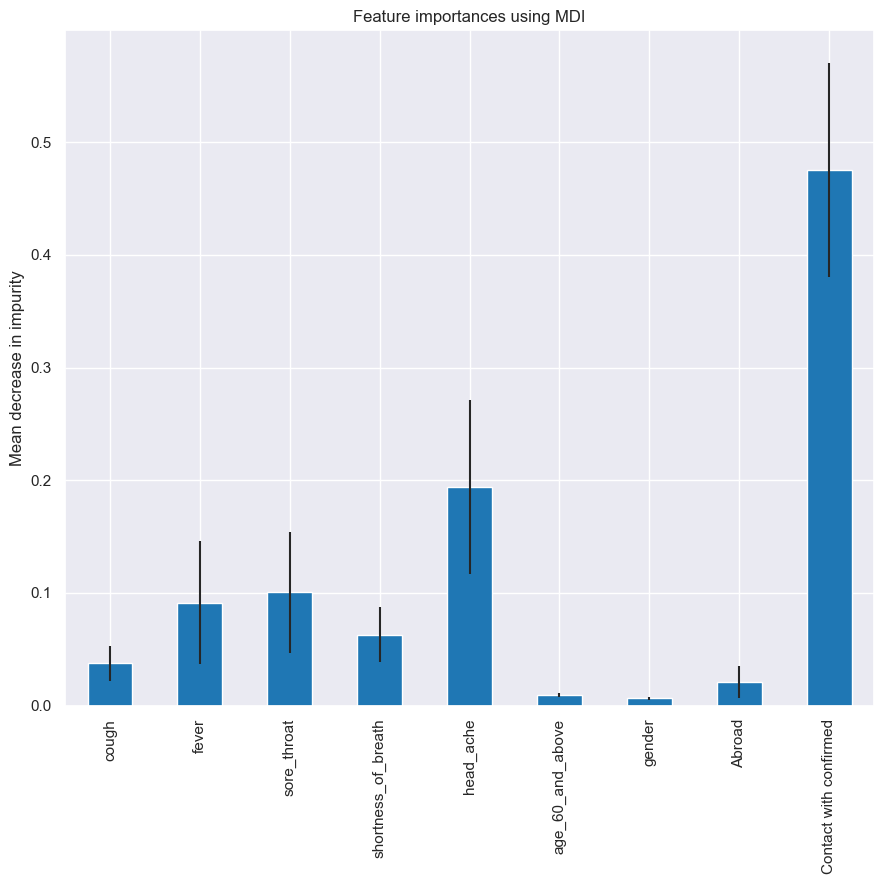

In [65]:
forest_importances = pd.Series(importances, index=myteam_data_set.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [66]:
start_time = time.time()
result = permutation_importance(
    random_forest, myteam_data_set, y, n_repeats=5, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=myteam_data_set.columns)

Elapsed time to compute the importances: 59.357 seconds


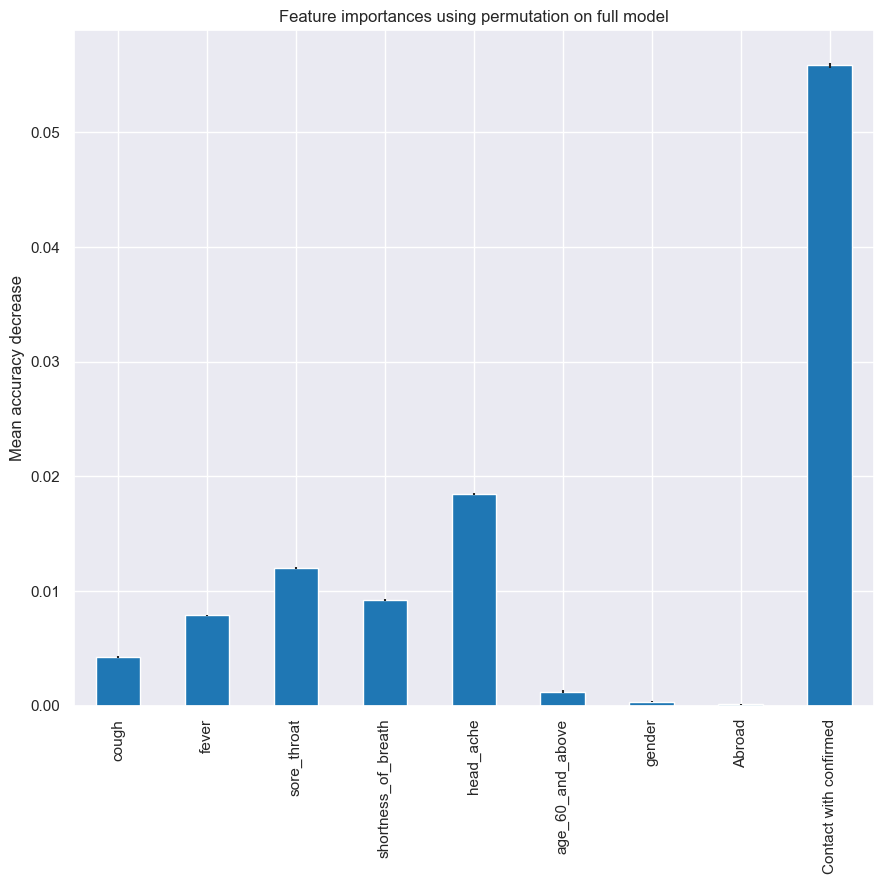

In [67]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Observation reveals that traits such as `Contact With Confirmed`, `Headache`, and `Sore Throat` are more relevant than others.

Through this effort, we have created a model that can determine an individual's COVID-19 status (positive or negative) based on their symptoms, with a focus on reducing the occurrence of false positives. We have successfully implemented a machine learning model designed to classify the data accurately and reliably.

# CONCLUSION 
The ultimate goal is to develop a machine learning model that accurately forecasts COVID-19 with a reduced set of features and tests. The research focuses on nine specific features and employs four diverse classification techniques: support vector machine, K closest neighbors, logistic regression, and decision tree. The data undergoes preprocessing before integration into the model. Among the strategies employed, both support vector machine and decision trees produce favorable outcomes, with decision trees being preferred due to their lower time complexity. To enhance accuracy, alternative approaches such as clustering, association rules, and genetic algorithms could be considered. Nevertheless, recognizing the constraints of this study, the pursuit of more sophisticated and integrated models is essential for achieving higher accuracy in early COVID-19 prediction.

Kaggle Data Set: https://www.kaggle.com/datasets/imdevskp/corona-virus-report